In [415]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import re
from os import path
from glob import glob
from tqdm import tqdm
import numpy as np
from matplotlib import cm
from pprint import pprint
from plotting_utils import get_legend_name, remove_outliers

In [416]:
ROOT_PATH = '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/Runtime'

In [417]:
files = glob(path.join(ROOT_PATH, '*', 'MatchResult_*.csv'))


In [418]:
StatisticsColumns = [
    'ReachedKnowledgeStep',
    'Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece']

In [419]:
replacements = {
    'met': 'method',
    'pla': 'player',
    'eff': 'simpleEffect',
    'obj': 'objective',
    'sim': 'simulation',
    'rat': 'almostRatio',
    'pdep': 'playerDepth',
}

def parse_filename(data):
    result = dict()
    for i in range(0, len(data), 2):
        if data[i] in replacements.keys():
            data[i] = replacements[data[i]]

        result[data[i]] = data[i+1]

    return result

In [432]:
dfs = []
for file_path in tqdm(files):
    # print(file_path)
    file_name = path.basename(file_path)

    _file_name = file_name.split('_')[1:-1]
    args = parse_filename(_file_name)

    df = pd.read_csv(file_path)

    for key, value in args.items():
        df[key] = value
    dfs.append(df)

original_df = pd.concat(dfs)

original_df['Sum_Matched'] = original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']  + \
    original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']
original_df.loc[original_df['method'] == 'random', 'simulation'] = 0

original_df['simpleEffect'] = original_df['simpleEffect'].replace(np.nan, 0)
original_df['objective'] = original_df['objective'].replace(np.nan, '-')

original_df.loc[original_df['method'] == 'random', 'playerDepth'] = '-'
original_df.loc[original_df['method'] == 'sampling', 'playerDepth'] = '-'
original_df.loc[original_df['method'] == 'ga', 'playerDepth'] = '-'
original_df.loc[original_df['method'] == 'ga2', 'playerDepth'] = '-'
original_df.loc[original_df['method'] == 'random', 'simulation'] = '-'
original_df.loc[original_df['method'] == 'ga', 'simulation'] = '-'
original_df.loc[original_df['method'] == 'ga2', 'simulation'] = '-'
# original_df.loc[original_df['method'] == 'sampling', 'simulation'] = '-'
original_df.loc[original_df['method'] == 'random', 'almostRatio'] = '-'
original_df.loc[original_df['method'] == 'sampling', 'almostRatio'] = '-'
original_df.loc[original_df['method'] == 'ga', 'almostRatio'] = '-'
original_df.loc[original_df['objective'] == 'kp', 'almostRatio'] = '-'
original_df.loc[original_df['objective'] == 'score', 'almostRatio'] = '-'
original_df.loc[original_df['method'] == 'ga', 'simulation'] = original_df.loc[original_df['method'] == 'ga', 'evo']

100%|██████████| 13/13 [00:00<00:00, 76.10it/s]


In [421]:
original_df

,EpisodeCount,StepCount,Time,InstanceUUID,SettleCount,ChangedCount,MeanGenerateRuntimes,StdGenerateRuntimes,MeanGenerateScores,StdGenerateScores,...,Target_RainbowPiece,method,player,simpleEffect,objective,evo,simulation,almostRatio,playerDepth,Sum_Matched
0,1,200,2023-06-06 16:10:00.559,36ce7add,0,0,3.554892,2.227754e+00,0.095534,0.272751,...,3,ga,1,1,knowledge,10,-,-,-,156
0,1,200,2023-06-06 15:54:00.481,2aaed08c,0,0,4.445067,2.827114e+00,0.082062,0.248286,...,3,ga,1,1,knowledge,20,-,-,-,228
0,1,200,2023-06-06 15:48:29.290,d1cbfc26,0,0,5.039569,3.391899e+00,0.081353,0.257645,...,3,ga,1,1,knowledge,30,-,-,-,234
0,1,200,2023-06-06 16:16:17.061,86672895,0,0,6.001655,3.883866e+00,0.093908,0.264847,...,3,ga,1,1,knowledge,40,-,-,-,210
0,1,200,2023-06-06 15:25:35.926,9f7fd6a4,0,0,0.232345,1.955789e-01,0.116032,0.298178,...,3,mcts,1,1,knowledge,NaN,1000,1.0,1,324
0,1,200,2023-06-06 15:31:49.095,a01bc9dc,0,0,0.122924,1.142682e-01,0.110777,0.298781,...,3,mcts,1,1,knowledge,NaN,100,1.0,1,78
0,1,200,2023-06-06 15:30:47.957,32d9fd56,0,0,0.234448,1.777326e-01,0.089986,0.256608,...,3,mcts,1,1,knowledge,NaN,200,1.0,1,330
0,1,200,2023-06-06 15:49:39.714,c25b742c,0,0,0.150261,1.724586e-01,0.092220,0.264419,...,3,mcts,1,1,knowledge,NaN,400,1.0,1,156
0,1,200,2023-06-06 15:23:52.986,72685cfb,0,0,0.000001,8.996043e-07,0.000000,0.000000,...,3,random,1,1,-,NaN,-,-,-,294
0,1,200,2023-06-06 15:34:27.284,f0bc56a5,0,0,0.538796,3.068706e-02,0.139918,0.317690,...,3,sampling,1,1,-,NaN,10,-,-,120


In [422]:
# 완료하지 못했을 경우, 에피소드 최대길이로 설정
original_df['ReachedKnowledgeStep'] = original_df['ReachedKnowledgeStep'].replace(-1, 200)
original_df['Q1ReachedKnowledgeStep'] = original_df['Q1ReachedKnowledgeStep'].replace(-1, 200)
original_df['Q2ReachedKnowledgeStep'] = original_df['Q2ReachedKnowledgeStep'].replace(-1, 200)
original_df['Q3ReachedKnowledgeStep'] = original_df['Q3ReachedKnowledgeStep'].replace(-1, 200)


In [423]:
for i in range(5):
    original_df['playerDepth'] = original_df['playerDepth'].replace(str(i), i)
for i in range(100, 1000, 100):
    original_df['simulation'] = original_df['simulation'].replace(str(i), i)

In [433]:
match_result = original_df.groupby(['method', 'objective', 'playerDepth', 'simulation'])[
                                      'method',
                                      'MeanGenerateRuntimes','StdGenerateRuntimes'].agg(
    {
        'MeanGenerateRuntimes': ['mean'],
        'StdGenerateRuntimes': ['mean'],
     }
)
match_result




C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


MeanGenerateRuntimes  \
                                                          mean   
method   objective playerDepth simulation                        
ga       knowledge -           10                     3.554892   
                               20                     4.445067   
                               30                     5.039569   
                               40                     6.001655   
mcts     knowledge 1           100                    0.122924   
                               1000                   0.232345   
                               200                    0.234448   
                               400                    0.150261   
random   -         -           -                      0.000001   
sampling -         -           10                     0.538796   
                               20                     1.135450   
                               30                     1.715889   
                               40                     2.277447   

                                          StdGenerateRuntimes  
                                                         mean  
method   objective playerDepth simulation                      
ga       knowledge -           10                2.227754e+00  
                               20                2.827114e+00  
                               30                3.391899e+00  
                               40                3.883866e+00  
mcts     knowledge 1           100               1.142682e-01  
                               1000              1.955789e-01  
                               200               1.777326e-01  
                               400               1.724586e-01  
random   -         -           -                 8.996043e-07  
sampling -         -           10                3.068706e-02  
                               20                4.965578e-02  
                               30                7.761779e-02  
                               40                9.270971e-02

### Full Result

In [425]:
# Drop outliers
match_result = original_df.copy()

match_result = match_result[~match_result['almostRatio'].isin(['0.75'])]
# match_result = match_result[~match_result['playerDepth'].isin([2])]
# match_result = match_result[~match_result['simulation'].isin([100, 400])]



columns_to_remove_outliers = ['Q1ReachedKnowledgeStep',
                              'Q2ReachedKnowledgeStep',
                              'Q3ReachedKnowledgeStep',
                              'ReachedKnowledgeStep']

for column in columns_to_remove_outliers:
    match_result[column] = match_result.groupby(['method', 'simpleEffect', 'objective', 'playerDepth', 'simulation'])[column].transform(remove_outliers)
    match_result = match_result[match_result[column] != -9999]

match_result_noout = match_result.copy()

# print(set(match_result['playerDepth']))
# pd.set_option('display.max_rows', None)
match_result = match_result.groupby(['method', 'simpleEffect','objective', 'playerDepth', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count']
     }
)
match_result


C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,,,,,method
,,,,,count
method,simpleEffect,objective,playerDepth,simulation,
ga,1,knowledge,-,-,4


### Depth 1 Result

In [426]:
# Drop outliers
match_result = original_df.copy()

match_result = match_result[~match_result['almostRatio'].isin(['0.75'])]
match_result = match_result[~match_result['playerDepth'].isin([2, 3])]
match_result = match_result[~match_result['objective'].isin([2, 3])]
match_result = match_result[~match_result['simulation'].isin([200])]


columns_to_remove_outliers = ['Q1ReachedKnowledgeStep',
                              'Q2ReachedKnowledgeStep',
                              'Q3ReachedKnowledgeStep',
                              'ReachedKnowledgeStep']

for column in columns_to_remove_outliers:
    match_result[column] = match_result.groupby(['method', 'simpleEffect', 'objective', 'playerDepth', 'simulation'])[column].transform(remove_outliers)
    match_result = match_result[match_result[column] != -9999]

# print(set(match_result['playerDepth']))
# pd.set_option('display.max_rows', None)

match_result.rename(columns={
                            'ReachedKnowledgeStep': '100%',
                            'Q1ReachedKnowledgeStep': '25%',
                            'Q2ReachedKnowledgeStep': '50%',
                            'Q3ReachedKnowledgeStep': '75%'
                            }, inplace=True)


match_result = match_result.groupby(['method', 'objective', 'simulation'])[
                                      '25%',
                                      '50%',
                                      '75%',
                                      '100%',
                                      'Sum_Matched'].agg(
    {
        'Sum_Matched': ['mean',],
        '25%': ['mean'],
        '50%': ['mean'],
        '75%': ['mean'],
        '100%': ['mean'],
     }
)
match_result

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,,,Sum_Matched,25%,50%,75%,100%
,,,mean,mean,mean,mean,mean
method,objective,simulation,,,,,
ga,knowledge,-,207.0,31.25,47.75,62.75,63.75


In [427]:
match_result.to_latex('match_count_table.tex', float_format="%.3f", escape=True)


In [428]:
display_graphs = ['random', 'ga',
                  'sampling_20',
                   'mcts_knowledge_1.0_1000_1',
                   'mcts_score_1000_1']

{'ga'}


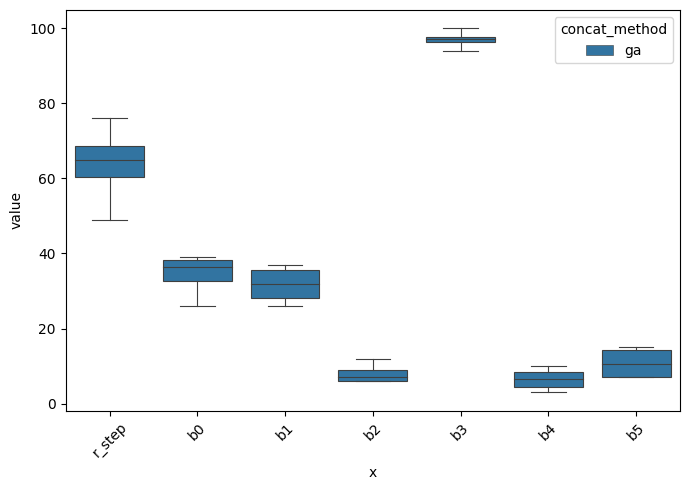

In [429]:
melted_df = match_result_noout.copy()

melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
pprint(set(melted_df['concat_method']))
# Display Target
melted_df = melted_df[melted_df['concat_method'].isin(['random', 'ga',
                                                       'sampling_20',
                                                       'mcts_knowledge_1.0_1000_1',
                                                       'mcts_score_1000_1'])]

plt.figure(figsize=(7, 5))
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*StatisticsColumns], ignore_index=False)

melted_df['x'] = melted_df['variable']
melted_df['x'] = melted_df['x'].str.replace('ReachedKnowledgeStep', 'r_step')
melted_df['x'] = melted_df['x'].str.replace('Matched_HorizontalPiece', 'b0')
melted_df['x'] = melted_df['x'].str.replace('Matched_VerticalPiece', 'b1')
melted_df['x'] = melted_df['x'].str.replace('Matched_CrossPiece', 'b2')
melted_df['x'] = melted_df['x'].str.replace('Matched_RocketPiece', 'b3')
melted_df['x'] = melted_df['x'].str.replace('Matched_BombPiece', 'b4')
melted_df['x'] = melted_df['x'].str.replace('Matched_RainbowPiece', 'b5')

ax = sns.boxplot(x="x", y="value", hue="concat_method", data=melted_df, linewidth=0.8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('matched_block.png')

In [430]:
from statannot import add_stat_annotation
from itertools import combinations

In [431]:
player_df = match_result_noout[match_result_noout['player'] == str(player_no)]
melted_df = player_df.copy()

melted_df.rename(columns={
    'ReachedKnowledgeStep':'100',
    'Q1ReachedKnowledgeStep':'25',
    'Q2ReachedKnowledgeStep':'50',
    'Q3ReachedKnowledgeStep':'75'
}, inplace=True)

_columns = ['25', '50', '75', '100']

sns.set_palette('Set2')
# melted_df = melted_df.groupby(['player', 'method', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'], value_vars=[*_columns], ignore_index=False)

melted_df = melted_df[melted_df['concat_method'].isin(display_graphs)]

plt.figure(figsize=(7, 4))
plt.clf()
ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

pairs = list()
for i in range(25, 101, 25):
    pairs.append(((str(i), 'mcts_knowledge_1.0_1000_1'), (str(i), 'mcts_score_1000_1')))
    pairs.append(((str(i), 'mcts_knowledge_1.0_1000_1'), (str(i), 'random')))
    pairs.append(((str(i), 'random'), (str(i), 'mcts_score_1000_1')))
    pairs.append(((str(i), 'random'), (str(i), 'sampling_20')))
    pairs.append(((str(i), 'mcts_score_1000_1'), (str(i), 'sampling_20')))
    pairs.append(((str(i), 'mcts_knowledge_1.0_1000_1'), (str(i), 'sampling_20')))

add_stat_annotation(ax, x="variable", y="value", hue="concat_method", data=melted_df,
                    box_pairs=pairs,
                    test='t-test_ind', text_format='star', loc='inside', verbose=1)

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
ax.set_title(f'Required Steps for Learning Skill (Player: {player_no})')
ax.set_xlabel('Progress (%)')
ax.set_ylabel('Step')
plt.tight_layout()
plt.savefig(f'./figures/learning_steps_p{player_no}', dpi=300)
    # plt.show()

NameError: name 'player_no' is not defined

In [ ]:

melted_df = match_result_noout.copy()

melted_df.rename(columns={
    'ReachedKnowledgeStep':'100',
    'Q1ReachedKnowledgeStep':'25',
    'Q2ReachedKnowledgeStep':'50',
    'Q3ReachedKnowledgeStep':'75'
}, inplace=True)

_columns = ['25', '50', '75', '100']

sns.set_palette('Set3')
# melted_df = melted_df.groupby(['player', 'method', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'], value_vars=[*_columns], ignore_index=False)

melted_df = melted_df[melted_df['concat_method'].isin(display_graphs)]


plt.figure(figsize=(7, 4))
plt.clf()
ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

pairs = list()
for i in range(25, 101, 25):
    pairs.append(((str(i), 'mcts_knowledge_1.0_1000_1'), (str(i), 'mcts_score_1000_1')))
    pairs.append(((str(i), 'mcts_knowledge_1.0_1000_1'), (str(i), 'random')))
    pairs.append(((str(i), 'random'), (str(i), 'mcts_score_1000_1')))
    pairs.append(((str(i), 'random'), (str(i), 'sampling_20')))
    pairs.append(((str(i), 'mcts_score_1000_1'), (str(i), 'sampling_20')))
    pairs.append(((str(i), 'mcts_knowledge_1.0_1000_1'), (str(i), 'sampling_20')))

add_stat_annotation(ax, x="variable", y="value", hue="concat_method", data=melted_df,
                    box_pairs=pairs,
                    test='t-test_ind', text_format='star', loc='inside', verbose=1)

plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))
ax.set_title(f'Required Steps for Learning Skill (Player: All)')
ax.set_xlabel('Progress (%)')
ax.set_ylabel('Step')
plt.savefig(f'./figures/learning_steps_pA', dpi=300)
# plt.show()